## This is a notebook that use Linear Regression to predict the Cummulative Grade Point


#Import modules


In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#Loading the dataset

In [2]:
#Load the data
df = pd.read_excel (r'C:\Users\Dell\Downloads\Y1S3.xlsx', sheet_name='Sheet1')


In [3]:
#Display the first 7 row of data
df.head(7)

,Gender,State,UALE1083,UCCD2103,UALF1003,UBMM1011,Semester2_GPA,Semester2_CGPA,Semester3_CGPA
0,Female,Pahang,63,50,52,56,2.35,2.830435,2.820513
1,Male,Kedah,72,68,76,54,3.15,2.917391,2.774359
2,Male,Malacca,81,76,70,69,3.50,3.108696,3.007692
3,Female,Kelantan,54,82,66,55,2.85,2.404348,2.797436
4,Male,Perak,59,73,67,54,2.80,2.878261,2.794872
5,Male,Johor,76,57,76,59,2.80,2.569565,2.607692
6,Female,Negeri Sembilan,62,58,64,75,2.50,2.565217,2.697436


In [4]:
#Count the number of rows and columns in the data set
df.shape

(10000, 9)

In [5]:
#Find the column that consist null value
df.isna().sum()

Gender            0
State             0
UALE1083          0
UCCD2103          0
UALF1003          0
UBMM1011          0
Semester2_GPA     2
Semester2_CGPA    3
Semester3_CGPA    7
dtype: int64

In [6]:
#Remove the row that consist of null value
df1=df.dropna()

In [7]:
#Check the if there still any null value
df1.isna().sum()

Gender            0
State             0
UALE1083          0
UCCD2103          0
UALF1003          0
UBMM1011          0
Semester2_GPA     0
Semester2_CGPA    0
Semester3_CGPA    0
dtype: int64

In [8]:
df1.describe()

,UALE1083,UCCD2103,UALF1003,UBMM1011,Semester2_GPA,Semester2_CGPA,Semester3_CGPA
count,9993.000000,9993.000000,9993.000000,9993.000000,9993.000000,9993.000000,9993.000000
mean,66.007305,65.918043,65.918143,65.886320,2.843255,2.783575,2.807913
std,8.480990,8.365451,8.369381,8.429765,0.424906,0.291618,0.204466
min,42.000000,42.000000,43.000000,42.000000,0.000000,1.421739,1.825641
25%,60.000000,60.000000,60.000000,59.000000,2.650000,2.608696,2.682051
50%,66.000000,66.000000,66.000000,66.000000,2.850000,2.817391,2.823077
75%,72.000000,72.000000,72.000000,72.000000,3.150000,3.000000,2.953846
max,89.000000,89.000000,89.000000,90.000000,3.700000,3.556522,3.333333


In [9]:
df1.dtypes

Gender             object
State              object
UALE1083            int64
UCCD2103            int64
UALF1003            int64
UBMM1011            int64
Semester2_GPA     float64
Semester2_CGPA    float64
Semester3_CGPA    float64
dtype: object

#Exploratory Data Analysis

[Text(0.5, 1.0, 'Year 1 Semester 3 CGPA')]

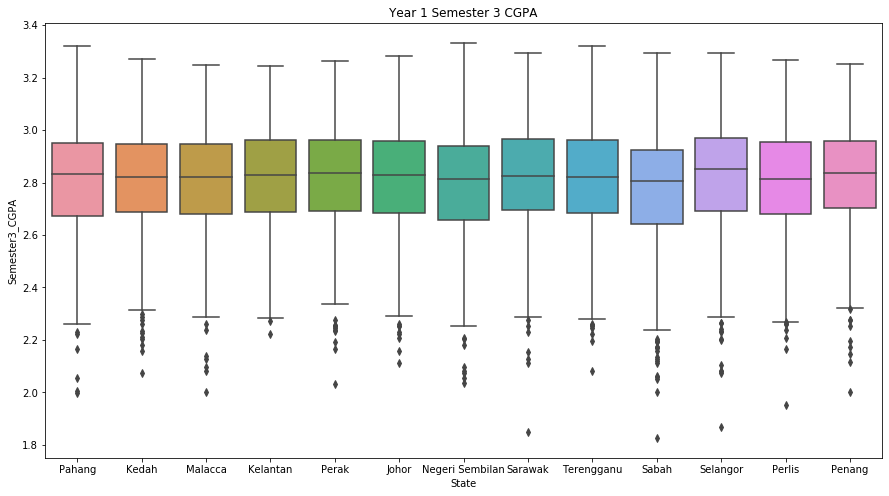

In [10]:
plt.figure(figsize=(15,8))
sns.boxplot(x='State', y='Semester3_CGPA',data=df1).set(title='Year 1 Semester 3 CGPA')

In [11]:
gen =df1[df1['Semester3_CGPA'].between(2.8,3.3)]

In [12]:
#Get a count of the number of each state
gen['State'].value_counts()

Johor              450
Selangor           449
Terengganu         438
Malacca            432
Kelantan           432
Negeri Sembilan    423
Perak              418
Sarawak            417
Perlis             415
Pahang             407
Penang             403
Kedah              403
Sabah              391
Name: State, dtype: int64

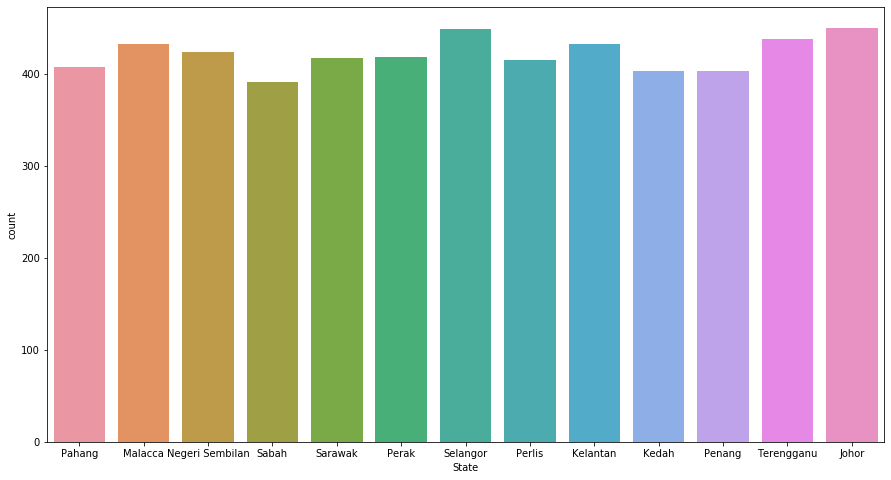

In [13]:
#Visualize the count of Grade
plt.figure(figsize=(15,8))
sns.countplot(gen['State'], label='count')

In [14]:
#Get a count of the number of each Gender
gen['Gender'].value_counts()


Male      2742
Female    2736
Name: Gender, dtype: int64

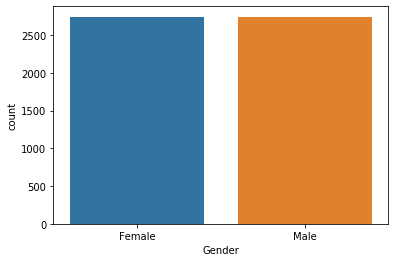

In [15]:
#Visualize the count of Gender
sns.countplot(gen['Gender'], label='count')

#Drop the column that does not related

In [16]:
df1.drop(['Gender','State'], axis='columns', inplace=True)

C:\Users\Dell\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [17]:
df1.shape

(9993, 7)

In [18]:
#Print the data after dropping the columns
df1.head()

,UALE1083,UCCD2103,UALF1003,UBMM1011,Semester2_GPA,Semester2_CGPA,Semester3_CGPA
0,63,50,52,56,2.35,2.830435,2.820513
1,72,68,76,54,3.15,2.917391,2.774359
2,81,76,70,69,3.50,3.108696,3.007692
3,54,82,66,55,2.85,2.404348,2.797436
4,59,73,67,54,2.80,2.878261,2.794872


#Splitting the data

In [19]:
#Split the data set into independent(X) and dependent(Y) data sets
y = df1.iloc[:,-1:]
X = df1.iloc[:,:-1]

In [20]:
#Split the data set into 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

#Feature Scaling

In [21]:
scaler = StandardScaler()

X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

#Model Training

In [22]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
print("Accuracy:" ,model.score(X_test, y_test)*100)

Accuracy: 70.00427743760515


In [24]:
prediction = model.predict(X_test)
print(prediction)
print(y_test)

[[3.01957089]
 [2.93209923]
 [3.01830343]
 ...
 [2.70817117]
 [2.49454297]
 [3.05905167]]
      Semester3_CGPA
1594        2.938462
2564        2.738462
2807        2.984615
6337        2.553846
1706        2.766667
...              ...
7           2.582051
8776        2.477143
6426        2.517949
9539        2.261538
9245        3.023077

[2998 rows x 1 columns]


In [25]:
import pickle 
pickle_out = open("Y1S3.pkl", mode = "wb") 
pickle.dump(model, pickle_out) 
pickle_out.close()